In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [7]:
# view options
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth',100)

## Hypothesis testing for Eniac-Case Study (Chi-Square Test)

### Null Hypothesis (H0) and Alternative Hypothesis (HA)

H0 : Click-through rate (CTR) is for all four versions of the website equal

HA: Click-through rate (CTR) is for at least one of the versions statistical significant different

### Choose significance level (alpha)

a relatively high alpha is acceptable in this case

In [2]:
alpha = 0.05

### Collect data (needs to be random and independent)

In [3]:
# load data from csv files

eniac_a = pd.read_csv('04_AB_Testing\Eniac-ABTest\eniac_a.csv')
eniac_b = pd.read_csv('04_AB_Testing\Eniac-ABTest\eniac_b.csv')
eniac_c = pd.read_csv('04_AB_Testing\Eniac-ABTest\eniac_c.csv')
eniac_d = pd.read_csv('04_AB_Testing\Eniac-ABTest\eniac_d.csv')

<>:3: SyntaxWarning: invalid escape sequence '\E'
<>:4: SyntaxWarning: invalid escape sequence '\E'
<>:5: SyntaxWarning: invalid escape sequence '\E'
<>:6: SyntaxWarning: invalid escape sequence '\E'
<>:3: SyntaxWarning: invalid escape sequence '\E'
<>:4: SyntaxWarning: invalid escape sequence '\E'
<>:5: SyntaxWarning: invalid escape sequence '\E'
<>:6: SyntaxWarning: invalid escape sequence '\E'
C:\Users\anna_\AppData\Local\Temp\ipykernel_25580\4193410696.py:3: SyntaxWarning: invalid escape sequence '\E'
  eniac_a = pd.read_csv('04_AB_Testing\Eniac-ABTest\eniac_a.csv')
C:\Users\anna_\AppData\Local\Temp\ipykernel_25580\4193410696.py:4: SyntaxWarning: invalid escape sequence '\E'
  eniac_b = pd.read_csv('04_AB_Testing\Eniac-ABTest\eniac_b.csv')
C:\Users\anna_\AppData\Local\Temp\ipykernel_25580\4193410696.py:5: SyntaxWarning: invalid escape sequence '\E'
  eniac_c = pd.read_csv('04_AB_Testing\Eniac-ABTest\eniac_c.csv')
C:\Users\anna_\AppData\Local\Temp\ipykernel_25580\4193410696.py:6: Sy

In [8]:
eniac_a

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,269,True,Homepage Version A - white SHOP NOW • https://eniac.com/index-a.php
1,25,div,mySidebar,309,True,"created 2021-09-14 • 14 days 0 hours 34 mins • 25326 visits, 23174 clicks"
2,4,a,Mac,279,True,NaN
3,69,a,iPhone,246,True,NaN
4,105,a,Accessories,1235,True,NaN
5,36,a,Chargers & Cables,1261,False,NaN
6,99,a,iPhone Accessories,1226,False,NaN
7,68,a,Watch Accessories,1261,False,NaN
8,13,a,Mac Accessories,1308,False,NaN
9,15,a,AirTag,206,False,NaN


### Get data for contingency table & look at CTRs for differenct versions

In [6]:
# number of clicks
button_a = eniac_a.loc[eniac_a['Name'] == 'SHOP NOW','No. clicks'].values[0]
button_b = eniac_b.loc[eniac_b['Name'] == 'SHOP NOW','No. clicks'].values[0]
button_c = eniac_c.loc[eniac_c['Name'] == 'SEE DEALS','No. clicks'].values[0]
button_d = eniac_d.loc[eniac_d['Name'] == 'SEE DEALS','No. clicks'].values[0]

In [9]:
# number of no clicks

# total clicks from info of each version
eniac_a_visits = 25326
eniac_b_visits = 24747
eniac_c_visits = 24876
eniac_d_visits = 25233

#no clicks = total clicks- number of clicks
eniac_a_no_click = eniac_a_visits - button_a
eniac_b_no_click = eniac_b_visits - button_b
eniac_c_no_click = eniac_c_visits - button_c
eniac_d_no_click = eniac_d_visits - button_d

In [11]:
# create contingency table
clicks = [button_a, button_b, button_c, button_d]
noclicks = [eniac_a_no_click, eniac_b_no_click, eniac_c_no_click, eniac_d_no_click]

observed_results = pd.DataFrame(data = [clicks, noclicks],
                                columns = ["Version_A", "Version_B", "Version_C", "Version_D"],
                                index = ["Click", "No-click"])

observed_results

,Version_A,Version_B,Version_C,Version_D
Click,512,281,527,193
No-click,24814,24466,24349,25040


In [10]:
# look at click-through rates
eniac_a_ctr = button_a / eniac_a_visits
eniac_b_ctr = button_b / eniac_b_visits
eniac_c_ctr = button_c / eniac_c_visits
eniac_d_ctr = button_d / eniac_d_visits

# display as DataFrame
rates = [eniac_a_ctr, eniac_b_ctr, eniac_c_ctr, eniac_d_ctr]
names = ["Version_A", "Version_B", "Version_C", "Version_D"]

ctr_df = pd.DataFrame({"rates": rates, "names": names})
ctr_df.sort_values("rates", ascending=False)

,rates,names
2,0.0212,Version_C
0,0.0202,Version_A
1,0.0114,Version_B
3,0.0076,Version_D


### Calculate chi-sqaured test

In [12]:
chisq, pvalue, df, expected = stats.chi2_contingency(observed_results)

In [13]:
pvalue

np.float64(2.716121660786871e-48)

### Interpret test result

In [14]:
if pvalue > alpha:
  print("Do not reject the null hypothesis")
else:
  print("Reject the null hypothesis")

Reject the null hypothesis


H0 needs to be rejected, so at least one of the versions performed significantly different (better or worse) than the others

### Investigate further to find possible winner

6 possible dual tests need to be performed:
- Version A - Version B
- Version A - Version C
- Version A - Version D
- Version B - Version C
- Version B - Version D 
- Version C - Version D


In [16]:
# adjust alpha
possible_combinations = 6
alpha_2 = alpha/possible_combinations
alpha_2

0.008333333333333333

perform dual tests

In [19]:
# A vs B
cont_AB = observed_results[['Version_A','Version_B']]

chisqrt_AB, pvalue_AB, df_AB, expected_AB = stats.chi2_contingency(cont_AB)

if pvalue_AB < alpha_2:
    print('H0 can be rejected')
else:
    print('H0 cannot be rejected')

H0 can be rejected


In [20]:
# A vs C
cont_AC = observed_results[['Version_A','Version_C']]

chisqrt_AC, pvalue_AC, df_AC, expected_AC = stats.chi2_contingency(cont_AC)

if pvalue_AC < alpha_2:
    print('H0 can be rejected')
else:
    print('H0 cannot be rejected')

H0 cannot be rejected


In [21]:
# A vs D
cont_AD = observed_results[['Version_A','Version_D']]

chisqrt_AD, pvalue_AD, df_AD, expected_AD = stats.chi2_contingency(cont_AD)

if pvalue_AD < alpha_2:
    print('H0 can be rejected')
else:
    print('H0 cannot be rejected')

H0 can be rejected


In [23]:
# B vs C
cont_BC = observed_results[['Version_B','Version_C']]

chisqrt_BC, pvalue_BC, df_BC, expected_BC = stats.chi2_contingency(cont_BC)

if pvalue_BC < alpha_2:
    print('H0 can be rejected')
else:
    print('H0 cannot be rejected')

H0 can be rejected


In [24]:
# B vs D
cont_BD = observed_results[['Version_B','Version_D']]

chisqrt_BD, pvalue_BD, df_BD, expected_BD = stats.chi2_contingency(cont_BD)

if pvalue_BD < alpha_2:
    print('H0 can be rejected')
else:
    print('H0 cannot be rejected')

H0 can be rejected


In [25]:
# C vs D
cont_CD = observed_results[['Version_C','Version_D']]

chisqrt_CD, pvalue_CD, df_CD, expected_CD = stats.chi2_contingency(cont_CD)

if pvalue_CD < alpha_2:
    print('H0 can be rejected')
else:
    print('H0 cannot be rejected')

H0 can be rejected


There is a statistical difference between the CTR of the different versions
- in detail:
    - no significant difference between A & C
    - rest has a statistical significant difference

### Interpretation (incl additional info given)

#### additional info:

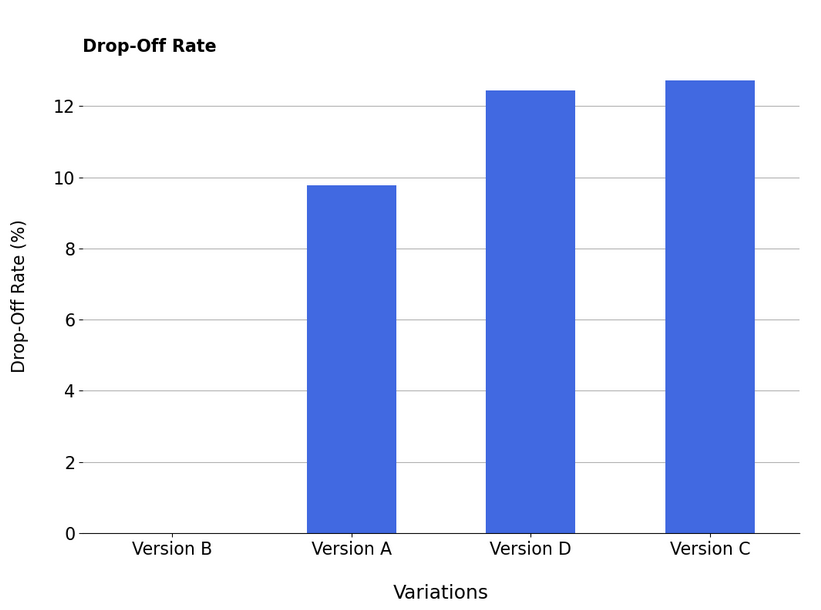

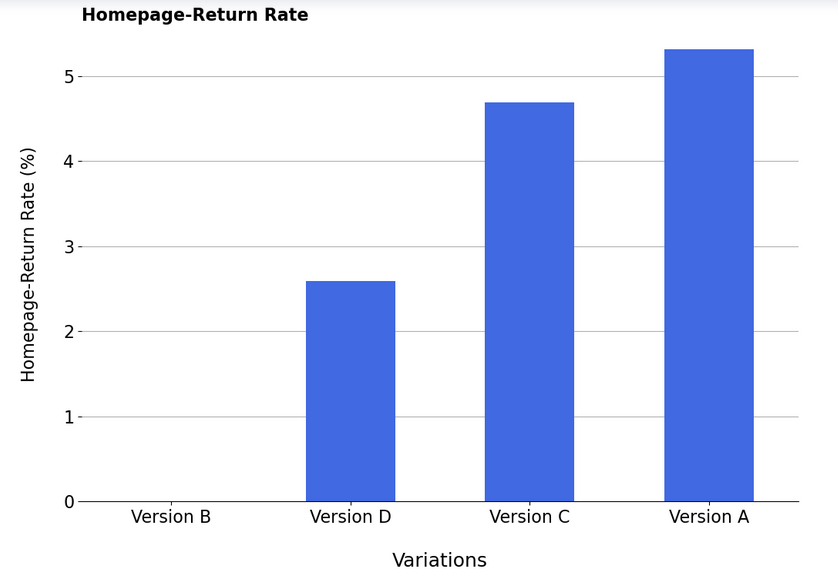

#### conclusion

Version A best option, highest CTR (no stat significance between A & C) , but low drop-off rate for Version A. However, high hompage return rate... 

Since A is the "old" version, no cost occur for changing when we keep it. Therefore best to leave the website as it is.

Red seems not to have a positive effect